<a href="https://colab.research.google.com/github/reinanbr/colab_notebooks/blob/main/exp3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

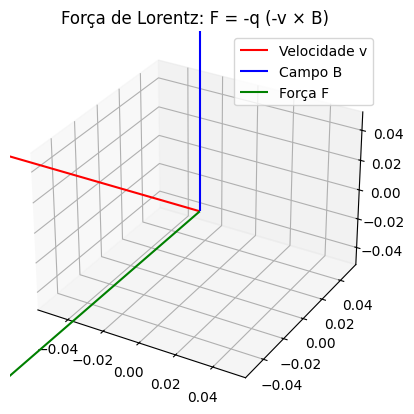

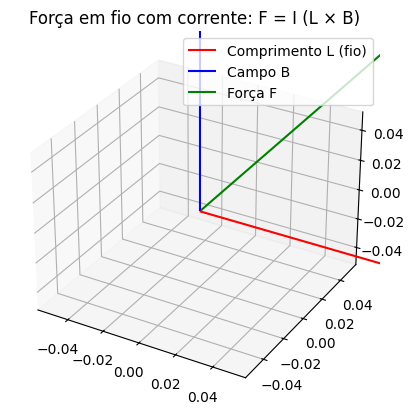

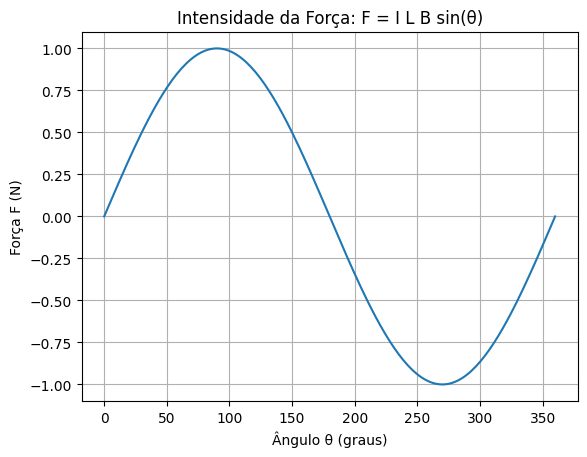

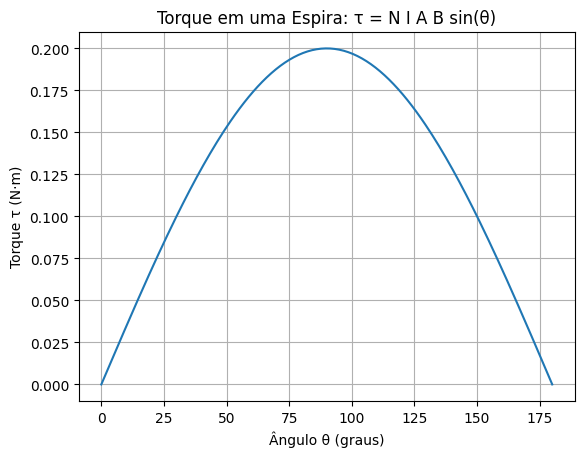

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# 1) Força de Lorentz numa carga em movimento
# -----------------------------------------
q = -1   # carga do elétron (C)
v = -np.array([1, 0, 0])   # velocidade em x
B = np.array([0, 0, 1])   # campo magnético em z
F = q * np.cross(v, B)    # F = q (v x B)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.quiver(0,0,0, *v, color="r", label="Velocidade v")
ax1.quiver(0,0,0, *B, color="b", label="Campo B")
ax1.quiver(0,0,0, *F, color="g", label="Força F")
ax1.set_title("Força de Lorentz: F = -q (-v × B)")
ax1.legend()

# -----------------------------------------
# 2) Força em um fio com corrente
# -----------------------------------------
I = -2.0     # corrente (A)
L = np.array([1, 0, 0])   # fio orientado em x
B = np.array([0, 0, 1])   # campo em z
F_wire = I * np.cross(L, B)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.quiver(0,0,0, *L, color="r", label="Comprimento L (fio)")
ax2.quiver(0,0,0, *B, color="b", label="Campo B")
ax2.quiver(0,0,0, *-F_wire, color="g", label="Força F")
ax2.set_title("Força em fio com corrente: F = I (L × B)")
ax2.legend()

# -----------------------------------------
# 3) Intensidade da força vs ângulo
# -----------------------------------------
theta = np.linspace(0, 2*np.pi, 200)
I, L, B = 2, 0.5, 1  # parâmetros
F_magnitude = I * L * B * np.sin(theta)

plt.figure()
plt.plot(np.degrees(theta), F_magnitude)
plt.xlabel("Ângulo θ (graus)")
plt.ylabel("Força F (N)")
plt.title("Intensidade da Força: F = I L B sin(θ)")
plt.grid(True)

# -----------------------------------------
# 4) Torque em uma espira
# -----------------------------------------
N, I, A, B = 10, 2, 0.01, 1  # voltas, corrente, área, campo
theta = np.linspace(0, np.pi, 200)
tau = N * I * A * B * np.sin(theta)

plt.figure()
plt.plot(np.degrees(theta), tau)
plt.xlabel("Ângulo θ (graus)")
plt.ylabel("Torque τ (N·m)")
plt.title("Torque em uma Espira: τ = N I A B sin(θ)")
plt.grid(True)

plt.show()


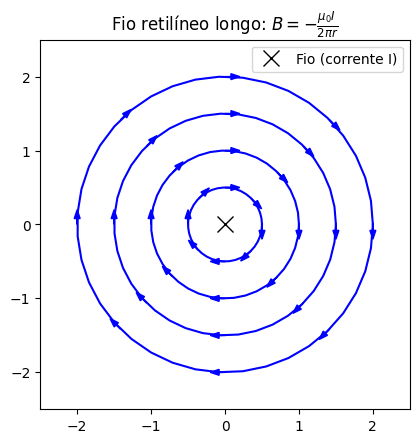

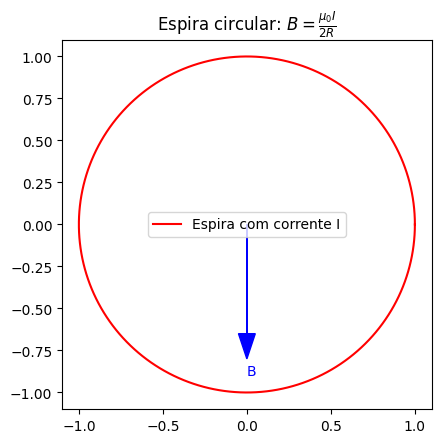

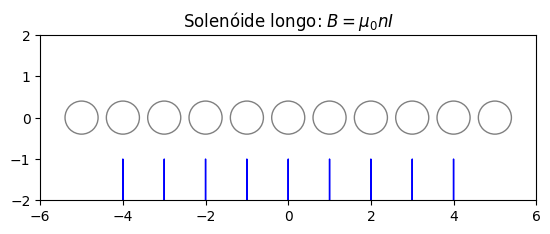

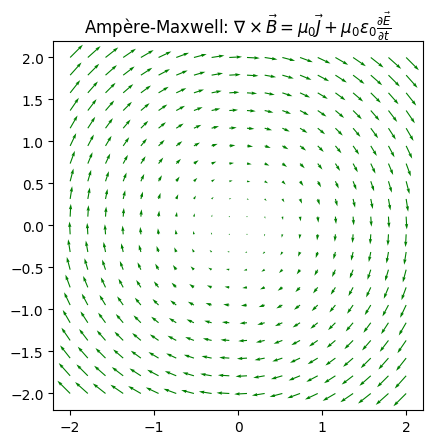

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir corrente (positivo = saindo do plano, negativo = entrando)
I = -1

# ---------------------------
# 1) Fio retilíneo longo (Lei de Ampère)
# ---------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title(r"Fio retilíneo longo: $B =- \frac{\mu_0 I}{2\pi r}$")

# Posição do fio no centro
marker = 'o' if I > 0 else 'x'  # bolinha para corrente saindo, X para entrando
ax.plot(0, 0, 'k'+marker, markersize=12, label="Fio (corrente I)")

# Linhas de campo circulares + setas
radii = [0.5, 1, 1.5, 2]
angles = np.linspace(0, 2*np.pi, 40)

for r in radii:
    x = r * np.cos(angles)
    y = r * np.sin(angles)
    ax.plot(x, y, 'b')
    # Adicionar setas no círculo
    for ang in np.linspace(0, 2*np.pi, 8, endpoint=False):
        dx = -np.sin(ang) * (1 if I > 0 else -1)
        dy = np.cos(ang) * (1 if I > 0 else -1)
        ax.arrow(r*np.cos(ang), r*np.sin(ang), 0.2*dx, 0.2*dy,
                 head_width=0.08, color="b", length_includes_head=True)

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.legend()

# ---------------------------
# 2) Espira circular (Lei de Biot–Savart simplificada)
# ---------------------------
theta = np.linspace(0, 2*np.pi, 200)
x = np.cos(theta)
y = np.sin(theta)

fig2, ax2 = plt.subplots()
ax2.plot(x, y, 'r', label="Espira com corrente I")

# Seta indicando B no centro (depende do sinal da corrente)
if I > 0:
    ax2.arrow(0, 0, 0, 0.8, head_width=0.1, color="b", length_includes_head=True)
    ax2.text(0, 0.9, "B", color="b")
else:
    ax2.arrow(0, 0, 0, -0.8, head_width=0.1, color="b", length_includes_head=True)
    ax2.text(0, -0.9, "B", color="b")

ax2.set_aspect("equal")
ax2.set_title(r"Espira circular: $B = \frac{\mu_0 I}{2R}$")
ax2.legend()

# ---------------------------
# 3) Solenóide longo (campo quase uniforme)
# ---------------------------
fig3, ax3 = plt.subplots()
ax3.set_aspect('equal')
ax3.set_title(r"Solenóide longo: $B = \mu_0 n I$")

# Desenho do solenóide
for i in range(-5,6):
    circle = plt.Circle((i,0), 0.4, fill=False, color="gray")
    ax3.add_patch(circle)

# Campo uniforme representado por setas (para cima se I>0, para baixo se I<0)
for i in range(-4,5):
    ax3.arrow(i, -1, 0, (2 if I > 0 else -2),
              head_width=0.2, color="b", length_includes_head=True)

ax3.set_xlim(-6, 6)
ax3.set_ylim(-2, 2)

# ---------------------------
# 4) Representação vetorial (Lei de Ampère-Maxwell)
# ---------------------------
x, y = np.meshgrid(np.linspace(-2,2,20), np.linspace(-2,2,20))
Bx = -y * (1 if I > 0 else -1)
By = x * (1 if I > 0 else -1)   # campo rotacional em torno da origem

fig4, ax4 = plt.subplots()
ax4.quiver(x, y, Bx, By, color="g")
ax4.set_aspect('equal')
ax4.set_title(r"Ampère-Maxwell: $\nabla \times \vec{B} = \mu_0 \vec{J} + \mu_0 \epsilon_0 \frac{\partial \vec{E}}{\partial t}$")

plt.show()


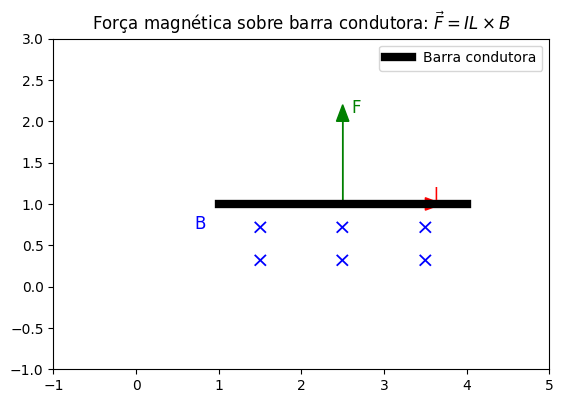

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 3)
ax.set_title("Força magnética sobre barra condutora: $\\vec{F} = I L \\times B$")

# --- Barra condutora ---
ax.plot([1,4], [1,1], 'k', lw=6, label="Barra condutora")

# --- Corrente (I) ---
ax.arrow(2.5, 1, 1.0, 0, head_width=0.15, head_length=0.2,
         fc='r', ec='r')
ax.text(3.6, 1.05, "I", color="r", fontsize=12)

# --- Campo magnético (B: entrando no plano = 'X') ---
for x in [1.5, 2.5, 3.5]:
    for y in [0.3, 0.7]:
        ax.text(x, y, "×", color="b", fontsize=16, ha='center', va='center')
ax.text(0.7, 0.7, "B", color="b", fontsize=12)

# --- Força resultante (F) ---
ax.arrow(2.5, 1, 0, 1.0, head_width=0.15, head_length=0.2,
         fc='g', ec='g')
ax.text(2.6, 2.1, "F", color="g", fontsize=12)

# --- Legenda ---
ax.legend(["Barra condutora"])

plt.show()
